# Pet Adoption Status Predictions

Our goal is to determine the various factors that influence pet adoption in order to predict which pets are more likely to be adopted. This dataset is imperative in finding solutions focused on increasing pet adoption rates. Therefore, using machine learning to find predictions can be an important tool in finding these solutions.


In [62]:
# Import our dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import sklearn as skl
import tensorflow as tf

In [2]:
# Create a path to CSV files, read the path and print DataFrame
file_path = (r"C:\Users\alexi\Desktop\Project4Group2\pet_adoption_data.csv")
pet_adoption = pd.read_csv(file_path)
pet_adoption

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,2502,Dog,Poodle,72,Orange,Small,27.039045,1,0,66,26,1,1
2003,2503,Rabbit,Rabbit,124,Brown,Small,4.726954,1,1,59,150,0,0
2004,2504,Rabbit,Rabbit,113,Orange,Small,1.758592,1,0,68,302,0,0
2005,2505,Dog,Labrador,12,Gray,Large,20.961592,1,0,59,478,0,0


In [3]:
# Clean Data: Drop all of the duplicates
pet_adoption_clean = pet_adoption.drop_duplicates(subset=None, keep='first', inplace=False)
pet_adoption_clean

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,2502,Dog,Poodle,72,Orange,Small,27.039045,1,0,66,26,1,1
2003,2503,Rabbit,Rabbit,124,Brown,Small,4.726954,1,1,59,150,0,0
2004,2504,Rabbit,Rabbit,113,Orange,Small,1.758592,1,0,68,302,0,0
2005,2505,Dog,Labrador,12,Gray,Large,20.961592,1,0,59,478,0,0


In [4]:
# Clean Data: Drop all of the Null Values
pet_adoption_clean = pet_adoption_clean.dropna(axis=1)
pet_adoption_clean

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,2502,Dog,Poodle,72,Orange,Small,27.039045,1,0,66,26,1,1
2003,2503,Rabbit,Rabbit,124,Brown,Small,4.726954,1,1,59,150,0,0
2004,2504,Rabbit,Rabbit,113,Orange,Small,1.758592,1,0,68,302,0,0
2005,2505,Dog,Labrador,12,Gray,Large,20.961592,1,0,59,478,0,0


In [5]:
# Review Statistics
pet_adoption_clean.describe()

,PetID,AgeMonths,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
count,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000
mean,1503.000000,92.279522,15.705776,0.701046,0.196313,43.974091,249.142003,0.301943,0.328351
std,579.515315,52.148363,8.327749,0.457914,0.397307,25.740253,142.887040,0.459215,0.469730
min,500.000000,1.000000,1.018198,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1001.500000,48.000000,8.730396,0.000000,0.000000,21.000000,127.000000,0.000000,0.000000
50%,1503.000000,94.000000,15.925416,1.000000,0.000000,45.000000,242.000000,0.000000,0.000000
75%,2004.500000,138.000000,22.737180,1.000000,0.000000,66.000000,375.000000,1.000000,1.000000
max,2506.000000,179.000000,29.995628,1.000000,1.000000,89.000000,499.000000,1.000000,1.000000


In [6]:
# Rename columns
pet_adoption_renamed = pet_adoption_clean.rename(columns={"PetID":"Pet_ID", "PetType":"Pet_Type","AgeMonths": "Age_in_Months", "WeightKg":"Weight_in_Kg", "HealthCondition":"Health_Condition",
                                                          "TimeInShelterDays":"Days_in_Shelter", "AdoptionFee":"Adoption_Fee", "PreviousOwner":"Previous_Owner",
                                                          "AdoptionLikelihood":"Adoption_Likelihood"})
pet_adoption_renamed

,Pet_ID,Pet_Type,Breed,Age_in_Months,Color,Size,Weight_in_Kg,Vaccinated,Health_Condition,Days_in_Shelter,Adoption_Fee,Previous_Owner,Adoption_Likelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,2502,Dog,Poodle,72,Orange,Small,27.039045,1,0,66,26,1,1
2003,2503,Rabbit,Rabbit,124,Brown,Small,4.726954,1,1,59,150,0,0
2004,2504,Rabbit,Rabbit,113,Orange,Small,1.758592,1,0,68,302,0,0
2005,2505,Dog,Labrador,12,Gray,Large,20.961592,1,0,59,478,0,0


In [7]:
# Export pet_adoption_renamed as a CSV file.
pet_adoption_renamed.to_csv("C:/Users/alexi/Desktop/Project4Group2/pet_adoption_renamed.csv", index=False)

## Health Condition vs. Adoption Likelihood

### Hypothesis: If the pet has no health conditions and have been vaccinated, we believe that the pet will most likely be adopted.

HealthCondition: Health condition of the pet (0 - Healthy, 1 - Medical condition)

AdoptionLikelihood: Likelihood of the pet being adopted (0 - Unlikely, 1 - Likely)

Vaccinated: Vaccination status of the pet (0 - Not vaccinated, 1 - Vaccinated)


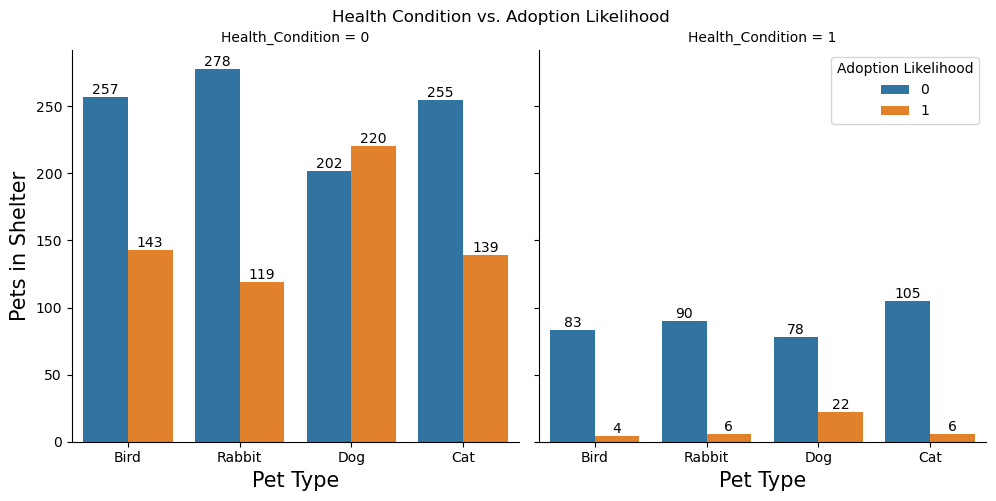

In [65]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import os
import seaborn as sns
healthcondition = sns.catplot(
    data=pet_adoption_renamed,
    x="Pet_Type",
    kind="count",
    hue="Adoption_Likelihood",
    col="Health_Condition",
    legend_out=False,
    legend="auto"
)
for ax in healthcondition.axes.ravel():
    for i in ax.containers:
        ax.bar_label(i, label_type="edge")
        ax.set_xlabel("Pet Type", fontsize=15)
        ax.set_ylabel("Pets in Shelter", fontsize=15)
        ax.set_title("Health Condition vs. Adoption Likelihood")
        healthcondition._legend.remove()
        healthcondition.set_titles(size=10)
        healthcondition.fig.subplots_adjust(top=0.9)
        healthcondition.fig.suptitle('Health Condition vs. Adoption Likelihood')

plt.legend(title = "Adoption Likelihood",loc="best")
plt.show()

healthcondition.figure.savefig("C:/Users/alexi/Desktop/Project4Group2/Fig1.png",bbox_inches='tight')

## Vaccinated Pets vs. Adoption Likelihood

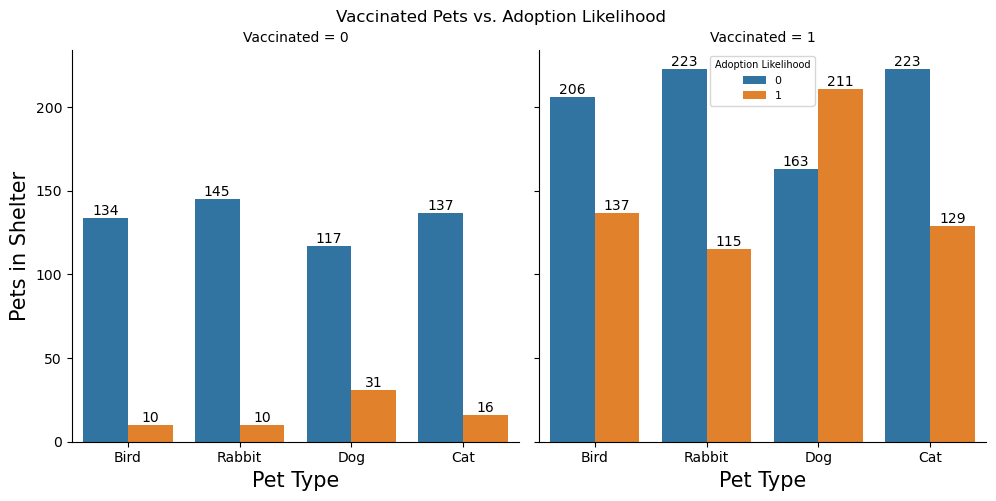

In [64]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import os
import seaborn as sns
vaccinated = sns.catplot(
    data=pet_adoption_renamed,
    x="Pet_Type",
    kind="count",
    hue="Adoption_Likelihood",
    col="Vaccinated",
    legend_out=False,
    legend="auto"
)
for ax in vaccinated.axes.ravel():
    for i in ax.containers:
        ax.bar_label(i, label_type="edge")
        ax.set_xlabel("Pet Type", fontsize=15)
        ax.set_ylabel("Pets in Shelter", fontsize=15)
        ax.set_title("Health Condition vs. Adoption Likelihood")
        vaccinated._legend.remove()
        vaccinated.set_titles(size=10)
        vaccinated.fig.subplots_adjust(top=0.9)
        vaccinated.fig.suptitle('Vaccinated Pets vs. Adoption Likelihood')

plt.legend(title = "Adoption Likelihood",title_fontsize = 7, fontsize=8,loc="upper center")
plt.show()

vaccinated.figure.savefig("C:/Users/alexi/Desktop/Project4Group2/Fig2.png",bbox_inches='tight')

## Vaccinated and Healthy

In [66]:
health_vaccinated = pet_adoption_renamed[["Pet_Type", "Vaccinated", "Health_Condition", "Adoption_Likelihood"]].copy()
health_vaccinated

,Pet_Type,Vaccinated,Health_Condition,Adoption_Likelihood
0,Bird,1,0,0
1,Rabbit,0,0,0
2,Dog,0,0,0
3,Bird,0,0,0
4,Rabbit,0,0,0
...,...,...,...,...
2002,Dog,1,0,1
2003,Rabbit,1,1,0
2004,Rabbit,1,0,0
2005,Dog,1,0,0


In [70]:
vaccinated = health_vaccinated[health_vaccinated['Vaccinated'] >=1]
vaccinated

,Pet_Type,Vaccinated,Health_Condition,Adoption_Likelihood
0,Bird,1,0,0
6,Bird,1,0,0
7,Cat,1,0,1
8,Bird,1,1,0
11,Rabbit,1,0,1
...,...,...,...,...
2002,Dog,1,0,1
2003,Rabbit,1,1,0
2004,Rabbit,1,0,0
2005,Dog,1,0,0


In [71]:
healthy = vaccinated[vaccinated['Health_Condition'] <=0]
healthy

,Pet_Type,Vaccinated,Health_Condition,Adoption_Likelihood
0,Bird,1,0,0
6,Bird,1,0,0
7,Cat,1,0,1
11,Rabbit,1,0,1
12,Dog,1,0,0
...,...,...,...,...
2001,Bird,1,0,1
2002,Dog,1,0,1
2004,Rabbit,1,0,0
2005,Dog,1,0,0


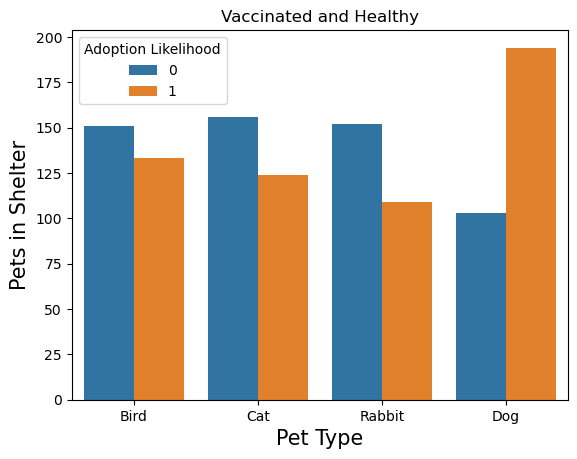

In [115]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
vaccinatedhealthy = sns.countplot(x = healthy['Pet_Type'],  hue = healthy['Adoption_Likelihood'])
plt.xticks(rotation=0)
vaccinatedhealthy.set_title("Vaccinated and Healthy")
vaccinatedhealthy.set_xlabel("Pet Type", fontsize=15)
vaccinatedhealthy.set_ylabel("Pets in Shelter", fontsize=15)
plt.legend(title = "Adoption Likelihood",loc="best")

vaccinatedhealthy.figure.savefig("C:/Users/alexi/Desktop/Project4Group2/Fig3.png",bbox_inches='tight')

## Unvaccinated and Health Condition

In [103]:
unhealthy_unvaccinated = pet_adoption_renamed[["Pet_Type", "Vaccinated", "Health_Condition", "Adoption_Likelihood"]].copy()
unhealthy_unvaccinated

,Pet_Type,Vaccinated,Health_Condition,Adoption_Likelihood
0,Bird,1,0,0
1,Rabbit,0,0,0
2,Dog,0,0,0
3,Bird,0,0,0
4,Rabbit,0,0,0
...,...,...,...,...
2002,Dog,1,0,1
2003,Rabbit,1,1,0
2004,Rabbit,1,0,0
2005,Dog,1,0,0


In [105]:
unvaccinated = unhealthy_unvaccinated[unhealthy_unvaccinated['Vaccinated'] <=0]
unvaccinated

,Pet_Type,Vaccinated,Health_Condition,Adoption_Likelihood
1,Rabbit,0,0,0
2,Dog,0,0,0
3,Bird,0,0,0
4,Rabbit,0,0,0
5,Dog,0,0,0
...,...,...,...,...
1975,Dog,0,0,0
1976,Bird,0,0,0
1978,Bird,0,1,0
1995,Rabbit,0,0,1


In [108]:
unhealthy = unvaccinated[unvaccinated['Health_Condition'] >=1]
unhealthy

,Pet_Type,Vaccinated,Health_Condition,Adoption_Likelihood
19,Dog,0,1,0
29,Rabbit,0,1,0
58,Cat,0,1,0
75,Dog,0,1,0
82,Bird,0,1,0
...,...,...,...,...
1862,Dog,0,1,1
1878,Cat,0,1,1
1929,Dog,0,1,1
1956,Dog,0,1,1


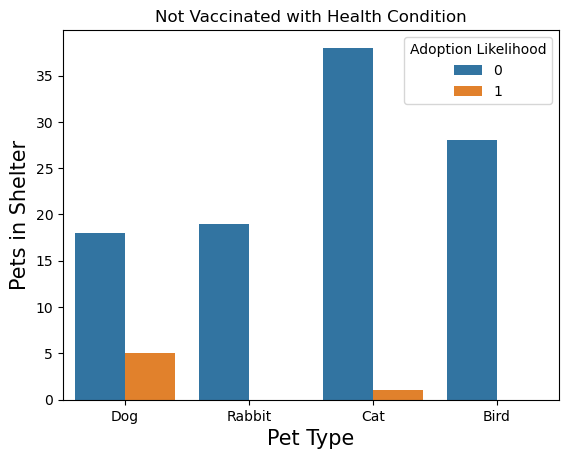

In [116]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
unvaccinatedunhealthy = sns.countplot(x = unhealthy['Pet_Type'],  hue = unhealthy['Adoption_Likelihood'])
plt.xticks(rotation=0)
unvaccinatedunhealthy.set_title("Not Vaccinated with Health Condition")
unvaccinatedunhealthy.set_xlabel("Pet Type", fontsize=15)
unvaccinatedunhealthy.set_ylabel("Pets in Shelter", fontsize=15)
plt.legend(title = "Adoption Likelihood",loc="best")

unvaccinatedunhealthy.figure.savefig("C:/Users/alexi/Desktop/Project4Group2/Fig4.png",bbox_inches='tight')

After creating these visualizations comparing the health condition status, vaccinated or unvaccinated pets, and likelihood of adoption, we discovered that there is not much of a correlation. Dogs seem to be the most likely to be adopted compared to the other animals regardless of their health or vaccination status. Contrary to what we predicted, owners are not likely to adopt a pet soley based on vaccination or health condition status. 